<h2>Caveat</h2>
Web sites often change the format of their pages so this may not always work. If it doesn't, rework the examples after examining the html content of the page (most browsers will let you see the html source - look for a "page source" option - though you might have to turn on the developer mode in your browser preferences. For example, on Chrome you need to click the "developer mode" check box under Extensions in the Preferences/Options menu. 

<h1>Scraping web pages</h1>
<li>Most data that resides on the web is in HTML 
<li>HTML: HyperText Markup Language
<li>An html web page is a structured document
<li>We can exploit this structure to extract data from the page

<li>Learn html and css at <a href="https://www.khanacademy.org/computing/computer-programming/html-css">this site</a>

<b>Web scraping</b>: Automating the process of extracting information from web pages<br>
<li>for data collection and analysis
<li>for incorporating in a web app 

<h2>Python libraries for web scraping</h2>
<li><b>requests</b> for handling the request-response cycle
<li><b>beautifulsoup4</b> for extracting data from an html string
<li><b>selenium</b> for extracting data from an html string and managing the response process, particularly when a page contains JavaScript or when a button needs to be clicked

<h2>Beautiful Soup</h2>
<li>html and xml parser
<li>makes use of formatted html tags and css properties to extract data
<li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<h2>Web scraping using beautifulsoup4</h2>

<h3>Import necessary modules</h3>

In [1]:
import requests
from bs4 import BeautifulSoup

<h3>The http request response cycle</h3>

In [2]:
url = "http://www.epicurious.com/search/Tofu Chili"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [6]:
keywords = input("Please enter the things you want to see in a recipe")
url = "http://www.epicurious.com/search/" + keywords
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Please enter the things you want to see in a recipepasta
Success


<h3>Set up the BeautifulSoup object</h3>

In [7]:
results_page = BeautifulSoup(response.content,'lxml')
print(results_page.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="app-id=312101965" name="apple-itunes-app"/>
  <title>
   Search | Epicurious.com
  </title>
  <link href="//assets.adobedtm.com" rel="dns-prefetch"/>
  <link href="https://www.google-analytics.com" rel="dns-prefetch"/>
  <link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//static.parsely.com" rel="dns-prefetch"/>
  <link href="//condenast.demdex.net" rel="dns-prefetch"/>
  <link href="//capture.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//pixel.condenastdigital.com" rel="dns-prefetch"/>
  <link href="//use.typekit.net" rel="dns-prefetch"/>
  <link href="//fonts.typekit.net" rel="dns-prefetch"/>
  <link href="//p.typekit.net" rel="dns-prefetch"/>
  <link href="//assets.epicurious.com" rel="dns-prefetch"/>
  <link href="//ad.doubleclick.net" rel="dns-prefetch"/>
  <link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
  <link href="//z.moatads.com" rel="dns-prefetch

<h3>BS4 functions</h3>

<h4>find_all finds all instances of a specified tag</h4>
<h4>returns a result_set (a list)</h4>

In [8]:
all_a_tags = results_page.find_all('a')
print(type(all_a_tags))

<class 'bs4.element.ResultSet'>


In [9]:
all_a_tags

[<a data-reactid="5" href="/" itemprop="url" title="Epicurious">Epicurious</a>,
 <a data-reactid="72" href="/recipes-menus/weekly-meal-plan-for-july-30-august-4-sweet-spicy-pork-chops-and-lemony-pasta-article">Weekly Meal Plan: July 30–August 4</a>,
 <a class="photo-link" data-reactid="74" href="/recipes-menus/weekly-meal-plan-for-july-30-august-4-sweet-spicy-pork-chops-and-lemony-pasta-article"><div class="photo-wrap" data-reactid="75"><div class="component-lazy pending" data-component="Lazy" data-reactid="76"></div></div></a>,
 <a class="view-complete-item" data-reactid="77" href="/recipes-menus/weekly-meal-plan-for-july-30-august-4-sweet-spicy-pork-chops-and-lemony-pasta-article" itemprop="url" title="Weekly Meal Plan: July 30–August 4"><!-- react-text: 78 -->View “<!-- /react-text --><!-- react-text: 79 -->Weekly Meal Plan: July 30–August 4<!-- /react-text --><!-- react-text: 80 -->”<!-- /react-text --></a>,
 <a data-reactid="85" href="/recipes-menus/weekly-meal-plan-shawarma-chick

<h4>find finds the first instance of a specified tag</h4>
<h4>returns a bs4 element</h4>


In [ ]:
div_tag = results_page.find('div')
print(div_tag)

In [ ]:
type(div_tag)


<h4>bs4 functions can be recursively applied on elements</h4>

In [ ]:
div_tag.find('a')

<h4>Both find as well as find_all can be qualified by css selectors</h4>
<li>using selector=value
<li>using a dictionary

<h4>Using selector=value</h4>

In [ ]:
#When using this method and looking for 'class' use 'class_' (because class is a reserved word in python)
#Note that we get a list back because find_all returns a list
results_page.find_all('article',class_="recipe-content-card")

<h4>Using selectors as key value pairs in a dictionary</h4>

In [ ]:
#Since we're using a string as the key, the fact that class is a reserved word is not a problem
#We get an element back because find returns an element
results_page.find('article',{'class':'recipe-content-card'})

<h4>get_text() returns the marked up text (the content) enclosed in a tag.</h4>
<li>returns a string

In [ ]:
results_page.find('article',{'class':'recipe-content-card'}).get_text()

<h4>get returns the value of a tag attribute</h4>
<li>returns a string

In [ ]:
recipe_tag = results_page.find('article',{'class':'recipe-content-card'})
recipe_link = recipe_tag.find('a')
print("a tag:",recipe_link)
link_url = recipe_link.get('href')
print("link url:",link_url)
print(type(link_url))

<h2>Summary of bs4 functions</h2>

 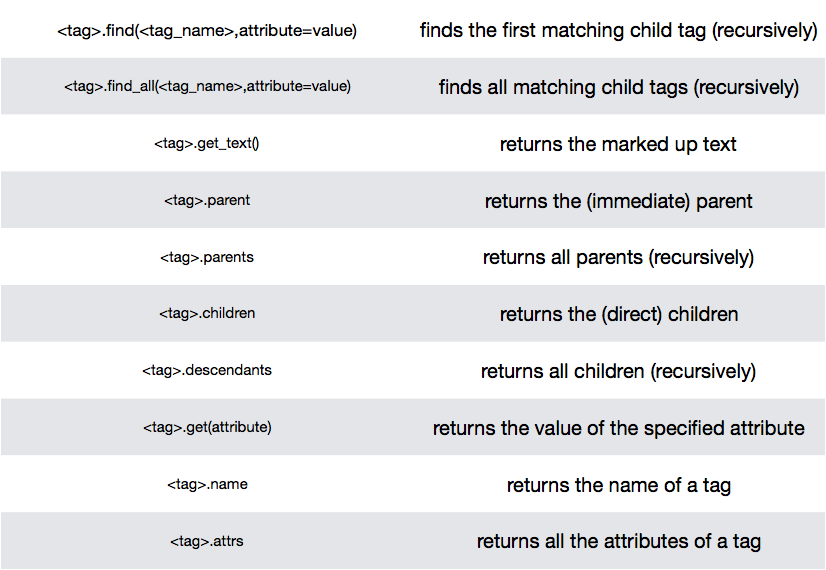

<h1>A function that returns a list containing recipe names, recipe descriptions (if any) and recipe urls</h1>


<li>We want to create a list of recipes and links to the recipes
<li>We need to figure out how to ‘programmatically’ extract each recipe name and recipe link

<li>Search for the tag with a unique attribute value that identifies recipes and recipe links
<li>We’ll look at the a (annotate) tags because clickable links are in a tags

In [ ]:
for tag in results_page.find_all('article'):
    print(tag)

In [ ]:
def get_recipes(keywords):
    recipe_list = list()
    import requests
    from bs4 import BeautifulSoup
    url = "http://www.epicurious.com/search/" + keywords
    response = requests.get(url)
    if not response.status_code == 200:
        return None
    try:
        results_page = BeautifulSoup(response.content,'lxml')
        recipes = results_page.find_all('article',class_="recipe-content-card")
        for recipe in recipes:
            recipe_link = "http://www.epicurious.com" + recipe.find('a').get('href')
            recipe_name = recipe.find('a').get_text()
            try:
                recipe_description = recipe.find('p',class_='dek').get_text()
            except:
                recipe_description = ''
            recipe_list.append((recipe_name,recipe_link,recipe_description))
        return recipe_list
    except:
        return None

In [ ]:
get_recipes("Tofu")

In [ ]:
get_recipes('Nothing')

<h2>Let's write a function that</h2>
<h3>given a recipe link</h3>
<h3>returns a dictionary containing the ingredients and preparation instructions</h3>

In [ ]:
recipe_link = "http://www.epicurious.com" + '/recipes/food/views/spicy-lemongrass-tofu-233844'

In [ ]:
def get_recipe_info(recipe_link):
    recipe_dict = dict()
    import requests
    from bs4 import BeautifulSoup
    try:
        response = requests.get(recipe_link)
        if not response.status_code == 200:
            return recipe_dict
        result_page = BeautifulSoup(response.content,'lxml')
        ingredient_list = list()
        prep_steps_list = list()
        for ingredient in result_page.find_all('li',class_='ingredient'):
            ingredient_list.append(ingredient.get_text())
        for prep_step in result_page.find_all('li',class_='preparation-step'):
            prep_steps_list.append(prep_step.get_text().strip())
        recipe_dict['ingredients'] = ingredient_list
        recipe_dict['preparation'] = prep_steps_list
        return recipe_dict
    except:
        return recipe_dict
        

In [ ]:
get_recipe_info(recipe_link)

<h2>Construct a list of dictionaries for all recipes</h2>

In [ ]:
def get_all_recipes(keywords):
    results = list()
    all_recipes = get_recipes(keywords)
    for recipe in all_recipes:
        recipe_dict = get_recipe_info(recipe[1])
        recipe_dict['name'] = recipe[0]
        recipe_dict['description'] = recipe[2]
        results.append(recipe_dict)
    return(results)

In [ ]:
get_all_recipes("Tofu")

<h1>Logging in to a web server</h1>

<li>Figure out the login url 
<li>https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page
<li>Look for the login form in the html source
<li>form_tag = page_soup.find('form')
<li>Look for ALL the inputs in the login form (some may be tricky!)
<li>input_tags = form_tag.find_all('input')
<li>Create a Python dict object with key,value pairs for each input
<li>Use requests.session to create an open session object
<li>Send the login request (POST)
<li>Send followup requests keeping the sessions object open

<h2>Get username and password</h2>
<li>Best to store in a file for reuse
<li>You will need to set up your own login and password and place them in a file called wikidata.txt
<li>Line one of the file should contain your username
<li>Line two your password

In [ ]:
with open('/Users/hardeepjohar/Documents/Courses/Fall2018/API_KEYS/wikidata.txt') as f:
    contents = f.read().split('\n')
    username = contents[0]
    password = contents[1]


<h3>Construct an object that contains the data to be sent to the login page</h3>

In [ ]:

payload = {
    'wpName': username,
    'wpPassword': password,
    'wploginattempt': 'Log in',
    'wpEditToken': "+\\",
    'title': "Special:UserLogin",
    'authAction': "login",
    'force': "",
    'wpForceHttps': "1",
    'wpFromhttp': "1",
    #'wpLoginToken': ‘', #We need to read this from the page
    }

<h3>get the value of the login token</h3>

In [ ]:
def get_login_token(response):
    soup = BeautifulSoup(response.text, 'lxml')
    token = soup.find('input',{'name':"wpLoginToken"}).get('value')
    return token


<h3>Setup a session, login, and get data</h3>

In [ ]:
import requests
from bs4 import BeautifulSoup
with requests.session() as s:
    response = s.get('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&returnto=Main+Page')
    payload['wpLoginToken'] = get_login_token(response)
    #Send the login request
    response_post = s.post('https://en.wikipedia.org/w/index.php?title=Special:UserLogin&action=submitlogin&type=login',
                           data=payload)
    #Get another page and check if we’re still logged in
    response = s.get('https://en.wikipedia.org/wiki/Special:Watchlist')
    data = BeautifulSoup(response.content,'lxml')
    print(data.find('div',class_='mw-changeslist').get_text())